In [ ]:
import PIL.Image as Image
import cv2
import numpy as np

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers,losses
from tensorflow.keras.models import Sequential

In [ ]:
import os
import zipfile

local_zip = '/content/test.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/dataset/test_set')
zip_ref.close()

In [ ]:
import os
import zipfile

local_zip = '/content/train.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/dataset/training_set')
zip_ref.close()

In [ ]:
import pathlib
train_dir = pathlib.Path("/content/dataset/training_set")
test_dir=pathlib.Path("/content/dataset/test_set")

print(train_dir)
print(test_dir)

In [ ]:
list(train_dir.glob('*/*'))[:5]


[PosixPath('/content/dataset/training_set/__MACOSX/cats'),
 PosixPath('/content/dataset/training_set/__MACOSX/dogs'),
 PosixPath('/content/dataset/training_set/cats/cat_531.jpg'),
 PosixPath('/content/dataset/training_set/cats/cat_280.jpg'),
 PosixPath('/content/dataset/training_set/cats/cat_102.jpg')]

In [ ]:
cat_train= list(train_dir.glob('cats/*'))
len(cat_train)

279

In [ ]:
image_count= len(list(train_dir.glob('*/*.jpg')))
image_count

557

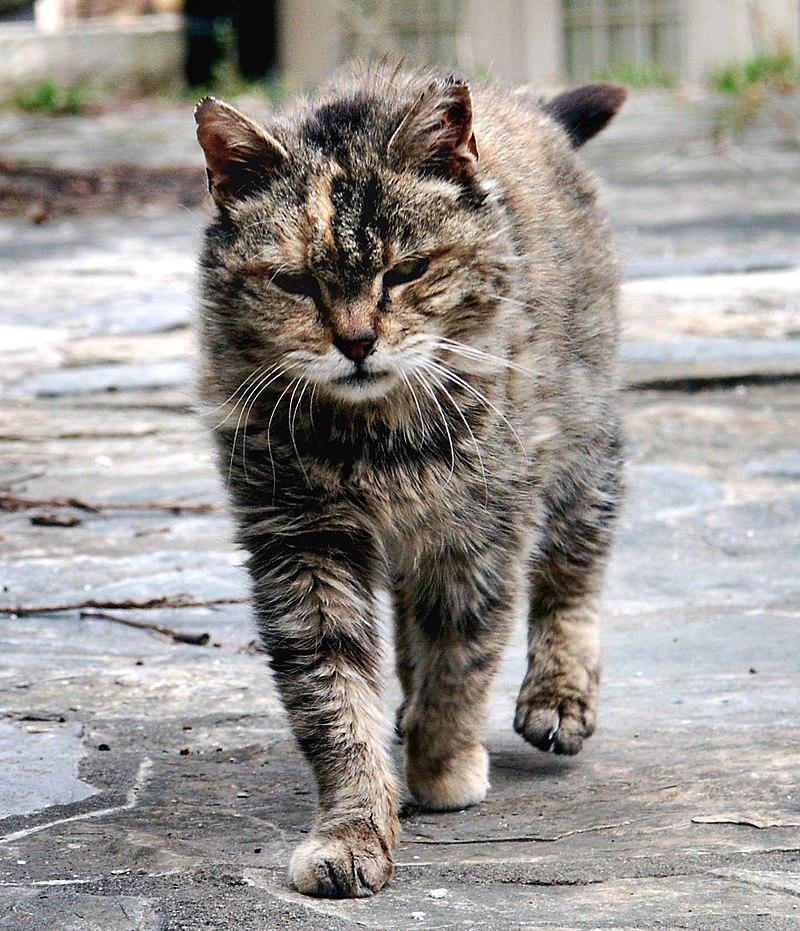

In [ ]:
Image.open(str(cat_train[100]))


In [ ]:
dog_train= list(train_dir.glob('dogs/*'))
len(cat_train)

279

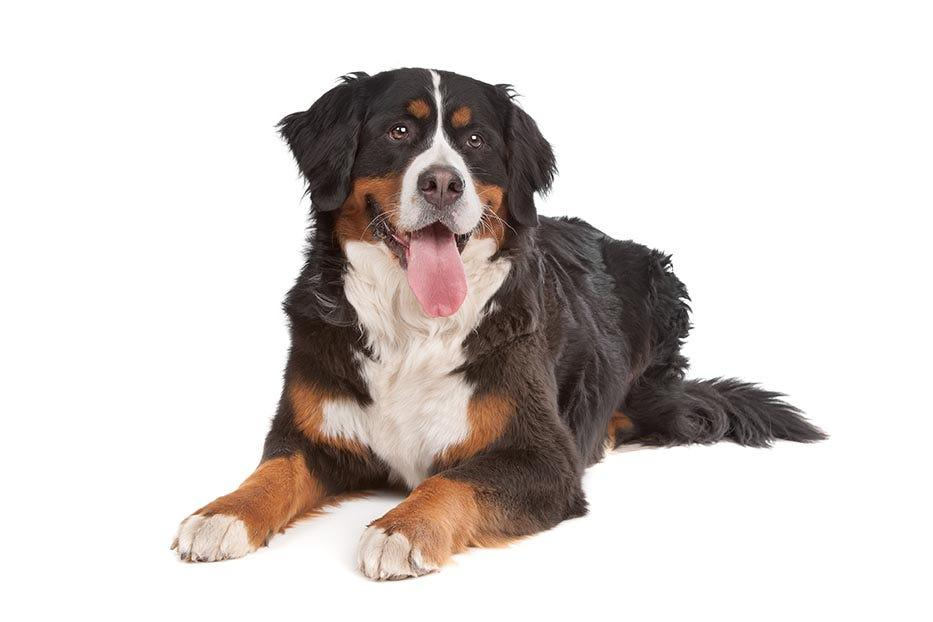

In [ ]:
Image.open(str(dog_train[169]))


In [ ]:
images_dict = {
    'cats': cat_train[:2200],
    'dogs': dog_train[:2200],
}

In [ ]:
images_dict["dogs"][:5]


[PosixPath('/content/dataset/training_set/dogs/dog_234.jpg'),
 PosixPath('/content/dataset/training_set/dogs/dog_535.jpg'),
 PosixPath('/content/dataset/training_set/dogs/dog_165.jpg'),
 PosixPath('/content/dataset/training_set/dogs/dog_156.jpg'),
 PosixPath('/content/dataset/training_set/dogs/dog_50.jpg')]

In [ ]:
labels_dict = {
    'cats': 0,
    'dogs': 1,

}

In [ ]:
img= cv2.imread(str(images_dict['cats'][0]))


In [ ]:
img.shape


(4272, 3288, 3)

In [ ]:
X, y = [], []
for name,images in images_dict.items():#returns key , path for each record
    for image in images:
        img=cv2.imread(str(image))

        resize_img=cv2.resize(img,(224,224))

        X.append(resize_img)
        y.append(labels_dict[name])

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
X.shape,y.shape


((557, 224, 224, 3), (557,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30 ,random_state=0)

In [ ]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [ ]:
pip install tf_keras

In [ ]:
import tf_keras

In [ ]:
model = tf_keras.Sequential([
                pretrained_model_without_top_layer,
                tf_keras.layers.Dense(2)
])

In [ ]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_7 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
# Scaling the image
X_train_scaled = X_train / 255
X_val_scaled = X_val / 255

In [ ]:
model.compile(
    optimizer="adam",
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc']
)
history = model.fit(X_train_scaled, y_train,validation_data=(X_val_scaled,y_val),epochs=5)

Epoch 1/5
13/13 [==============================] - 32s 2s/step - loss: 0.5233 - acc: 0.7481 - val_loss: 0.2939 - val_acc: 0.9107
Epoch 2/5
13/13 [==============================] - 26s 2s/step - loss: 0.1947 - acc: 0.9177 - val_loss: 0.2273 - val_acc: 0.9405
Epoch 3/5
13/13 [==============================] - 23s 2s/step - loss: 0.1298 - acc: 0.9434 - val_loss: 0.1910 - val_acc: 0.9464
Epoch 4/5
13/13 [==============================] - 25s 2s/step - loss: 0.0953 - acc: 0.9640 - val_loss: 0.1788 - val_acc: 0.9464
Epoch 5/5
13/13 [==============================] - 25s 2s/step - loss: 0.0749 - acc: 0.9846 - val_loss: 0.1709 - val_acc: 0.9524


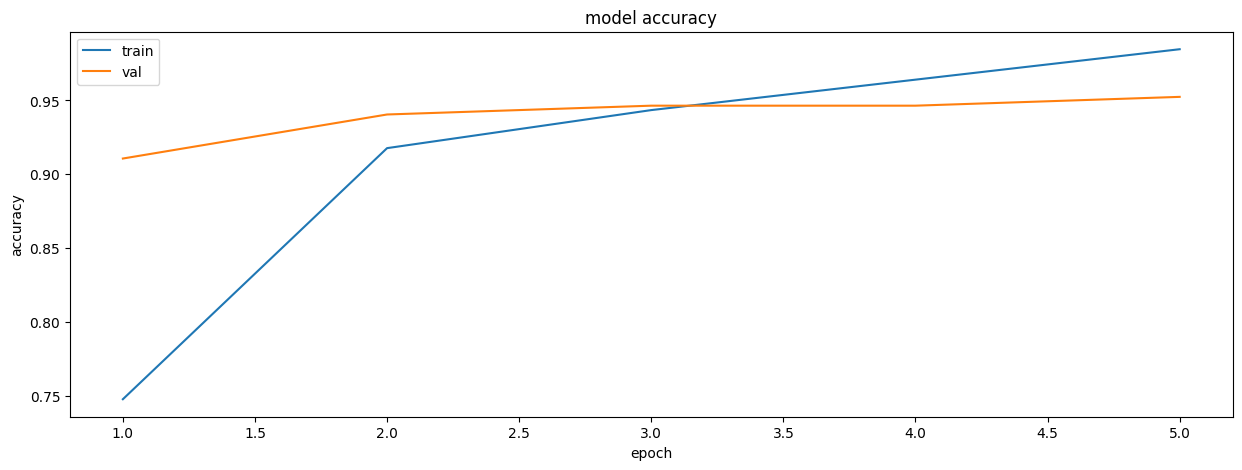

In [ ]:
plt.figure(figsize=(15,5))
epochs=range(1,len(history.history['val_acc'])+1)

plt.plot(epochs,history.history['acc'])
plt.plot(epochs,history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

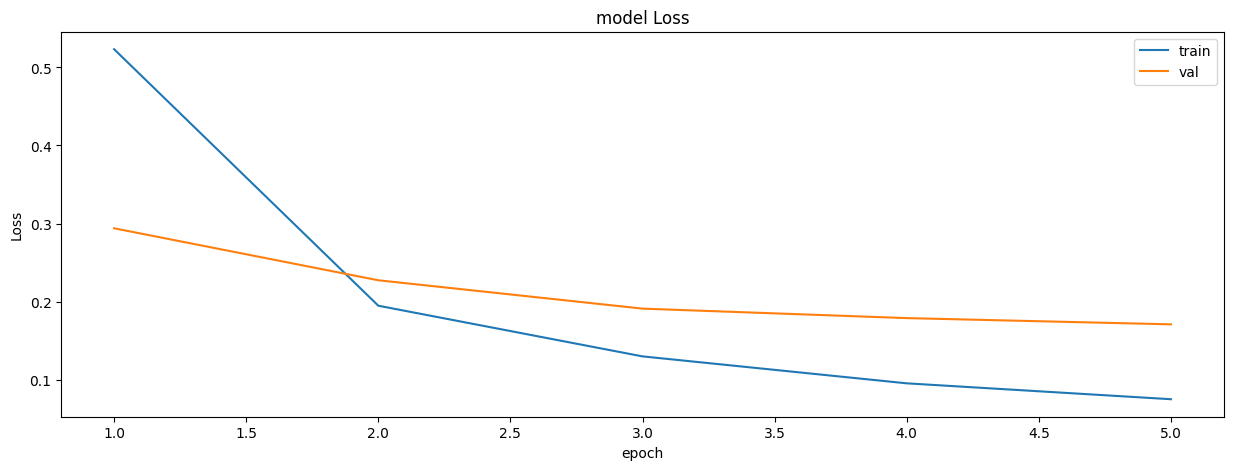

In [ ]:
plt.figure(figsize=(15,5))
epochs=range(1,len(history.history['val_loss'])+1)

plt.plot(epochs,history.history['loss'])
plt.plot(epochs,history.history['val_loss'])
plt.title('model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [ ]:
cat_test= list(test_dir.glob('cats/*'))
dog_test= list(test_dir.glob('dogs/*'))

In [ ]:
len (dog_test)


70

In [ ]:
test_images_dict = {
    'cats': cat_test,
    'dogs': dog_test,
}

test_labels_dict = {
    'cats': 0,
    'dogs': 1,

}

In [ ]:
X_test, y_test = [], []
for name,images in test_images_dict.items():#returns key , path for each record
    for image in images:
        img=cv2.imread(str(image))

        resize_img=cv2.resize(img,(224,224))

        X_test.append(resize_img)
        y_test.append(test_labels_dict[name])

In [ ]:
X_test = np.array(X_test)
y_test = np.array(y_test)

In [ ]:
X_test.shape


(140, 224, 224, 3)

In [ ]:
X_test_scaled = X_test / 255

In [ ]:
model.evaluate(X_test_scaled,y_test)


5/5 [==============================] - 5s 902ms/step - loss: 0.1858 - acc: 0.9000


[0.18582065403461456, 0.8999999761581421]